# Popularity Analysis

Author: Miraya (code for files from Audrey)

## Creating Dataframes

In [65]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
files = os.listdir('data') # function lists the content of a directory
files

['02-14-16-57_save_data_all_videos_AY.csv',
 '02-14-16-57_data_saved_videos_AY.csv',
 '02-14-19-04_save_data_all_videos_AY.csv',
 '02-14-16-57_control_data_all_videos_AY.csv',
 '02-14-20-33_save_data_all_videos.csv',
 '02-14-17-04_data_saved_videos.csv',
 '02-14-17-05_control_data_all_videos.csv',
 '02-14-20-33_data_saved_videos.csv',
 '02-14-19-03_control_data_all_videos_AY.csv',
 '02-14-20-34_control_data_all_videos.csv',
 '02-14-19-04_data_saved_videos_AY.csv',
 '02-14-17-04_save_data_all_videos.csv']

In [8]:
# create tuples for each pair during data collection
onlyAllData = [f for f in files if 'data_all' in f]     # filter out saved videos
onlyAllData = sorted(onlyAllData)

collection_times = []

for i in range(0, len(onlyAllData) - 1, 2):
    collection_times.append((onlyAllData[i][:11], onlyAllData[i+1][:11]))

print(collection_times)

[('02-14-16-57', '02-14-16-57'), ('02-14-17-04', '02-14-17-05'), ('02-14-19-03', '02-14-19-04'), ('02-14-20-33', '02-14-20-34')]


In [9]:
## Helper functions
def createPostID(row):
    """helper function: create a new value using music and author"""
    return f"{row['music']}_{row['author']}"

# for splitting hashtags  
splitter = lambda x: np.nan if pd.isna(x) else [s.strip() for s in str(x).split(',')]
# create 3 dfs: control data, save data, all data

In [10]:
control_dfs = []
save_dfs = []
all_dfs = []

for fN in onlyAllData: # folder with files that have all posts
    path = os.path.join('data', fN) # create file path
    df = pd.read_csv(path) # create dataframe

    # add column to indicate date/time collected
    df['collectionTime'] = fN[:11]

    # add column with unique post id
    df['postID'] = df.apply(createPostID, axis=1) # use axis=1 to process one row at a time

    # split hashtags into list
    #df['hashtag'] = df['hashtag'].apply(splitter)

    if 'control'in fN:
        control_dfs.append(df)
    else:
        save_dfs.append(df)

    all_dfs.append(df)


df_control = pd.concat(control_dfs, ignore_index=True)
df_save = pd.concat(save_dfs, ignore_index=True)
df_all = pd.concat(all_dfs, ignore_index=True)

print("control shape:", df_control.shape)
print("save shape:", df_save.shape)
print("all data shape:", df_all.shape)

control shape: (1912, 11)
save shape: (1954, 11)
all data shape: (3866, 11)


In [11]:
df_control.head() #testing

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
0,1,0,original sound - ®️ Louieveegang💙,@louieveemoonteenmoonfam,louieveedee,297300,1571,20300,721,02-14-16-57,original sound - ®️ Louieveegang💙_louieveedee
1,1,1,original sound - dayz915,"atodamadre%F0%9F%8F%A7, %F0%9F%A4%99%F0%9F%8F%...",dayz.915,522299,3713,36500,142900,02-14-16-57,original sound - dayz915_dayz.915
2,1,2,original sound - DermDoctor | Dr. Shah,"@poblanopepp, dermatographia",dermdoctor,430100,4758,24900,6591,02-14-16-57,original sound - DermDoctor | Dr. Shah_dermdoctor
3,1,3,original sound - 𝐝𝐢𝐧𝐨 🎀,"@lashedchars, fy, fyp, fyp%E3%82%B7%E3%82%9Avi...",marschvarl,251,29,31,0,02-14-16-57,original sound - 𝐝𝐢𝐧𝐨 🎀_marschvarl
4,1,4,original sound - AfroSamuraiT,"lifehack, lifehacks, challenge, ksi, prime",afrosamuraitt,65200,3487,11700,189,02-14-16-57,original sound - AfroSamuraiT_afrosamuraitt


In [12]:
df_save.head() #testing

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
0,1,0,original sound - ESPN,"@wendy.bri, snow, cold",espn,2000000,19900,170800,108600,02-14-16-57,original sound - ESPN_espn
1,1,1,I Have No Enemies - ★DGK132105,"@asianjeffontop, toastyog, streamer, fortnite,...",toasty1k,51200,441,3322,59,02-14-16-57,I Have No Enemies - ★DGK132105_toasty1k
2,1,2,Asn - thsituan._.,NaN,ccabots,203000,4712,124700,3817,02-14-16-57,Asn - thsituan._._ccabots
3,1,3,Like That Sped Up - Laila!,"@bareandneutral, ingrown",dermdoctor,357800,561,11300,2068,02-14-16-57,Like That Sped Up - Laila!_dermdoctor
4,1,4,original sound - Funny,NaN,baby_ok7,3100000,34500,378200,81300,02-14-16-57,original sound - Funny_baby_ok7


In [13]:
df_save.tail() #testing

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
1949,5,24,original sound - KEEMOKAZI,"unboxmagicalmoments, minisoblindboxcarnival, m...",keemokazi,634200,1647,35100,1016,02-14-20-33,original sound - KEEMOKAZI_keemokazi
1950,5,25,原聲 - Andy,NaN,yy256618yx0,19800,23700,3964,848,02-14-20-33,原聲 - Andy_yy256618yx0
1951,5,26,original sound - Shalom,"biracial, mixed, girls, multicultural, black, ...",shalomadkins,75100,1788,4327,2988,02-14-20-33,original sound - Shalom_shalomadkins
1952,5,27,Monkeys Spinning Monkeys - Kevin MacLeod & Kev...,"fyp, bold",seumlarde.com,90500,429,4728,367,02-14-20-33,Monkeys Spinning Monkeys - Kevin MacLeod & Kev...
1953,5,28,"Spooky, quiet, scary atmosphere piano songs - ...","conspiracy, horror, theory",horroriginz,38100,611,6367,7584,02-14-20-33,"Spooky, quiet, scary atmosphere piano songs - ..."


In [14]:
df_control.tail()

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
1907,5,19,follow ladvblep - julie,NaN,1van1vanovich,213100,4477,24600,1422,02-14-20-34,follow ladvblep - julie_1van1vanovich
1908,5,20,original sound - nessaabarrett,"aelfriceden, aelfricedenfamily, outfit, ootd, ...",nessaabarrett135,14300,37,611,28,02-14-20-34,original sound - nessaabarrett_nessaabarrett135
1909,5,21,Play with Fire (feat. Yacht Money) - Sam Tinnesz,kdrama,xoteam,7095,37,391,8,02-14-20-34,Play with Fire (feat. Yacht Money) - Sam Tinne...
1910,5,22,original sound - Derryck Spikes,NaN,derryckspikes,95300,142,4001,498,02-14-20-34,original sound - Derryck Spikes_derryckspikes
1911,5,23,original sound - Court House,"fyp, judge, fyoupage",court.house6,1700000,10300,84000,12700,02-14-20-34,original sound - Court House_court.house6


## Calculating Metrics

In [29]:
saved_collectionTime = df_save.collectionTime.unique()
print(saved_collectionTime)

['02-14-16-57' '02-14-17-04' '02-14-19-04' '02-14-20-33']


In [30]:
control_collectionTime = df_control.collectionTime.unique()
print(control_collectionTime)

['02-14-16-57' '02-14-17-05' '02-14-19-03' '02-14-20-34']


In [33]:
#Replacing the time stamps in the control dataframe with the corresponding timestamps in the saved dataframe
df_control['collectionTime'].replace({'02-14-17-05': '02-14-17-04', '02-14-19-03': '02-14-19-04', '02-14-20-34': '02-14-20-33'}, inplace=True)

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
1907,5,19,follow ladvblep - julie,NaN,1van1vanovich,213100,4477,24600,1422,02-14-20-33,follow ladvblep - julie_1van1vanovich
1908,5,20,original sound - nessaabarrett,"aelfriceden, aelfricedenfamily, outfit, ootd, ...",nessaabarrett135,14300,37,611,28,02-14-20-33,original sound - nessaabarrett_nessaabarrett135
1909,5,21,Play with Fire (feat. Yacht Money) - Sam Tinnesz,kdrama,xoteam,7095,37,391,8,02-14-20-33,Play with Fire (feat. Yacht Money) - Sam Tinne...
1910,5,22,original sound - Derryck Spikes,NaN,derryckspikes,95300,142,4001,498,02-14-20-33,original sound - Derryck Spikes_derryckspikes
1911,5,23,original sound - Court House,"fyp, judge, fyoupage",court.house6,1700000,10300,84000,12700,02-14-20-33,original sound - Court House_court.house6


In [34]:
#Testing the replace
df_control.tail() 

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
1907,5,19,follow ladvblep - julie,NaN,1van1vanovich,213100,4477,24600,1422,02-14-20-33,follow ladvblep - julie_1van1vanovich
1908,5,20,original sound - nessaabarrett,"aelfriceden, aelfricedenfamily, outfit, ootd, ...",nessaabarrett135,14300,37,611,28,02-14-20-33,original sound - nessaabarrett_nessaabarrett135
1909,5,21,Play with Fire (feat. Yacht Money) - Sam Tinnesz,kdrama,xoteam,7095,37,391,8,02-14-20-33,Play with Fire (feat. Yacht Money) - Sam Tinne...
1910,5,22,original sound - Derryck Spikes,NaN,derryckspikes,95300,142,4001,498,02-14-20-33,original sound - Derryck Spikes_derryckspikes
1911,5,23,original sound - Court House,"fyp, judge, fyoupage",court.house6,1700000,10300,84000,12700,02-14-20-33,original sound - Court House_court.house6


In [38]:
#Testing the replace
df_control[1000:1010]

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
1000,2,11,original sound - emann💕,"fyp%E3%82%B7, makemfamous, blowthisup, viral, ...",yungemann,262400,697,18300,942,02-14-19-04,original sound - emann💕_yungemann
1001,2,12,original sound - HolyGxd ( HolyGod ),NaN,holygxd74,48400,416,3280,2707,02-14-19-04,original sound - HolyGxd ( HolyGod )_holygxd74
1002,2,13,original sound - Raihann,NaN,whodis.mujica,22600,72,621,145,02-14-19-04,original sound - Raihann_whodis.mujica
1003,2,14,original sound - ANAR DREAMS 💎,NaN,pandaboy.us,153400,5854,9253,4128,02-14-19-04,original sound - ANAR DREAMS 💎_pandaboy.us
1004,2,15,som original - Buiu do corte 👏🏼,NaN,alexandersuleymanoff,33400,3583,2005,568,02-14-19-04,som original - Buiu do corte 👏🏼_alexandersuley...
1005,2,16,original sound - Buddy bam,"familyguy, kidnapper, fyp, explorepage",zurielnathan,566800,7305,74600,11700,02-14-19-04,original sound - Buddy bam_zurielnathan
1006,2,17,Very Sad - Enchan,"pourtoi, dayvonjr, memo600, kungvon, booka600,...",0.51melly,134100,3246,11700,483,02-14-19-04,Very Sad - Enchan_0.51melly
1007,2,18,original sound - .,"skipping, school, losers, fyp%E3%82%B7, housto...",5star.liindaa,81700,361,5264,422,02-14-19-04,original sound - ._5star.liindaa
1008,2,19,Suara Seram Sangat Mencekam - Kholil Buitenzorg,"randomfacts, facts, curiosity, knowledge, didy...",__.random.facts.___,8164,11500,1349,7183,02-14-19-04,Suara Seram Sangat Mencekam - Kholil Buitenzor...
1009,2,20,original sound - gracie ౨ৎ,"@omgvalty, zepeto, zepetogirl, zepetocouple",leylaa.zpt,104700,1511,14200,6368,02-14-19-04,original sound - gracie ౨ৎ_leylaa.zpt


In [60]:
def findAverages(popularity_metric):
    """
    This function takes in a popularity metric (likes/shares/comments/saves) as its parameter and calculates the average of that metric 
    at the 4 different timestamps for both the control and experimental groups. The output is a dataframe where the columns are
    control and experimental groups and the rows are averages for different timestamps. 
    """
    results = pd.DataFrame({'collectionTime': [], 'control':[], 'saved': []})
    for time in saved_collectionTime:
        #defining the conditions for selecting rows from the df
        condition_saved = df_save['collectionTime'] == time
        condition_control = df_control['collectionTime'] == time

        #calculating the average of the metric for each timestamp
        average_saved = round(df_save[condition_saved][popularity_metric].mean(), 2)
        average_control = round(df_control[condition_control][popularity_metric].mean(), 2)

        #appending these averages to the result dataframes
        results.loc[len(results.index)] = [time, average_control, average_saved] 

    #returning the dataframe
    return results

In [61]:
#Testing with the likes metric
likes_df = findAverages('likes')
likes_df

,collectionTime,control,saved
0,02-14-16-57,656877.54,638859.33
1,02-14-17-04,821132.85,680968.89
2,02-14-19-04,511200.34,676940.82
3,02-14-20-33,563701.99,567728.18


In [62]:
#Test worked. Creating dfs for each metric
shares_df = findAverages('shares')
comments_df = findAverages('comments')
saves_df = findAverages('saves')

## Plotting Metrics

Text(0, 0.5, 'average likes')

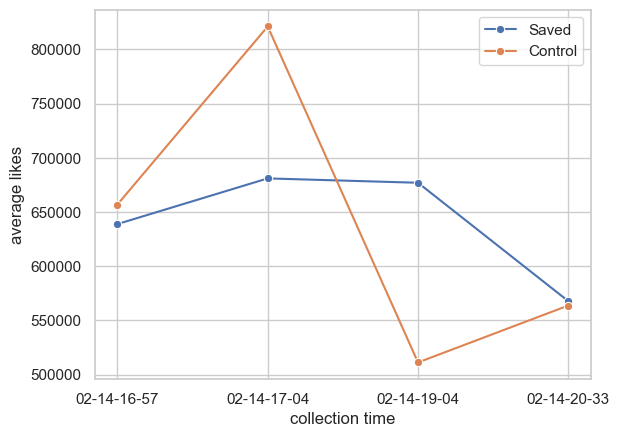

In [80]:
#Creating line plots with seaborn
#LIKES
sns.set(style="whitegrid")
plt_likes = sns.lineplot(x='collectionTime', y='saved', data=likes_df, label = 'Saved', marker ='o')
sns.lineplot(x='collectionTime', y='control', data=likes_df, label = 'Control', marker ='o')
plt_likes.set_xlabel('collection time')
plt_likes.set_ylabel('average likes')

Text(0, 0.5, 'average comments')

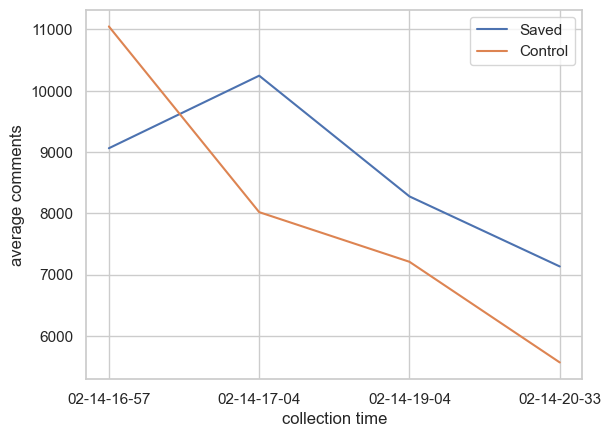

In [81]:
#COMMENTS
plt_comments = sns.lineplot(x='collectionTime', y='saved', data=comments_df, label = 'Saved')
sns.lineplot(x='collectionTime', y='control', data=comments_df, label = 'Control')
plt_comments.set_xlabel('collection time')
plt_comments.set_ylabel('average comments')

Text(0, 0.5, 'average shares')

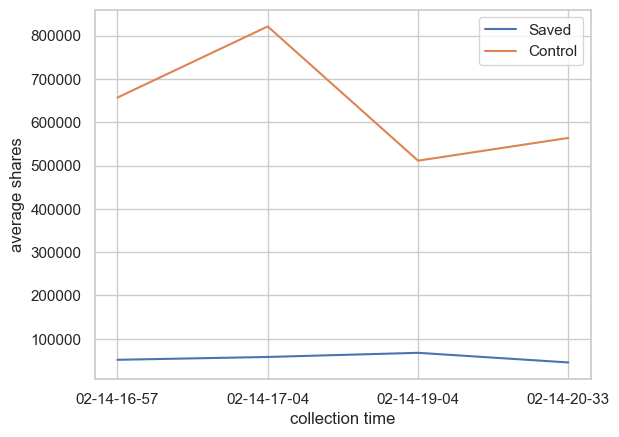

In [82]:
#SHARES
plt_shared = sns.lineplot(x='collectionTime', y='saved', data=shares_df, label = 'Saved')
sns.lineplot(x='collectionTime', y='control', data=likes_df, label = 'Control')
plt_shared.set_xlabel('collection time')
plt_shared.set_ylabel('average shares')

Text(0, 0.5, 'average saves')

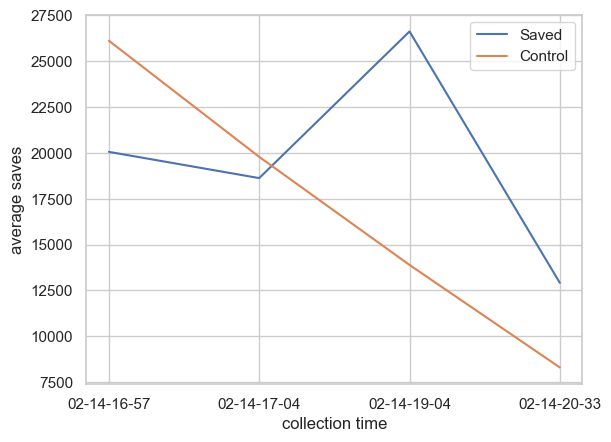

In [83]:
#SAVES
plt_saves = sns.lineplot(x='collectionTime', y='saved', data=saves_df, label = 'Saved')
sns.lineplot(x='collectionTime', y='control', data=saves_df, label = 'Control')
plt_saves.set_xlabel('collection time')
plt_saves.set_ylabel('average saves')